In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import glob
import os
from dask.diagnostics import ProgressBar
import gfdl_utils as gu
import matplotlib.pyplot as plt

In [28]:
pathDict_hfds = {'pp':('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp'),
           'ppname':'ocean_annual',
           'out':'ts',
           'local':'annual/5yr',
           'time':'*',
           'add':'hfds',
           }

pathDict_fgco2 = {'pp':('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp'),
           'ppname':'ocean_cobalt_omip_2d',
           'out':'ts',
           'local':'annual/5yr',
           'time':'*',
           'add':'fgco2',
           }

In [29]:
gridpath = gu.core.get_pathstatic(pathDict_hfds['pp'],pathDict_hfds['ppname'])

In [30]:
ds_hfds = gu.core.open_frompp(**pathDict_hfds)
ds_fgco2 = gu.core.open_frompp(**pathDict_fgco2)
grid = xr.open_dataset(gridpath)

In [18]:
# with ProgressBar():
#     (ds['fgco2']*grid['areacello']).sum(['xh','yh']).to_netcdf('../../data/esm4/processed/global_integrals/esm4_fgco2.nc')

[########################################] | 100% Completed | 30.0s


In [31]:
with ProgressBar():
    hfds = (ds_hfds['hfds']*grid['areacello']).sum(['xh','yh']).load()
    fgco2 = (ds_fgco2['fgco2']*grid['areacello']).sum(['xh','yh']).load()

[########################################] | 100% Completed |  4.3s
[########################################] | 100% Completed |  4.6s


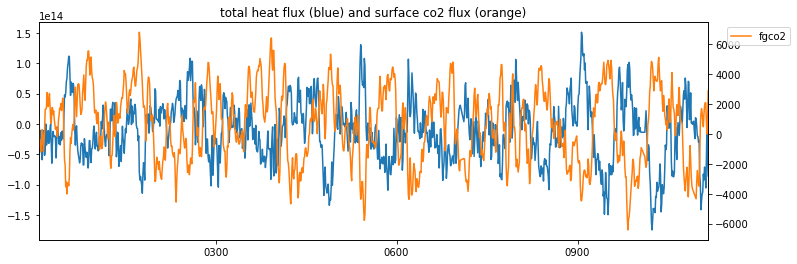

In [42]:
fig,ax = plt.subplots(figsize=(12,4))
ax1 = ax
v = hfds.rolling(time=10,center=True).mean()
ax1.plot(v['time'],v,label='hfds',color='tab:blue')
ax1.autoscale(enable=True,axis='x',tight=True)
ax2 = ax1.twinx()
v = fgco2.rolling(time=10,center=True).mean()
ax2.plot(v['time'],v,label='fgco2',color='tab:orange')
ax2.autoscale(enable=True,axis='x',tight=True)
plt.legend(loc='upper left',bbox_to_anchor=(1.02,1))
ax1.set_title('total heat flux (blue) and surface co2 flux (orange)')

fig.savefig('../../figures/esm4/ts.hfds-fgco2.rolling-time10.png')

In [28]:
!mamba install -y -c conda-forge nc-time-axis


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.7.4) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['nc-time-axis']

pkgs/main/linux-64       [<=>                 ] (00m:00s) 
pkgs/main/linux-64     